# Bank Credit Scoring

## Business Description

**Understanding Credit Scores**

A credit score is a statistical analysis conducted by banks and financial institutions to assess the creditworthiness of borrowers. It plays a crucial role in the lending decision process, helping financial entities to measure the risk associated with extending loans.

**Key Factors Impacting Credit Scores**

Several factors influence the computation of a credit score, which serves as a numerical representation of an individual's credit history. These factors include the borrower's repayment history, the duration of their credit history, the number of previous credit inquiries, and the amount of active credit cards and loans. When combined, these elements yield a credit score, a tool that banks employ to make informed lending decisions.

**Challenges in Credit Scoring**

Despite its utility, credit scoring presents several challenges that banks must be aware of:

1. *Limited Credit History*: Not all borrowers possess an extensive credit history, making it challenging to establish a robust credit score.

2. *Bank Size and Strategy*: The size and strategic orientation of a bank also influence credit scoring. For instance, a borrower with a strong credit score may prefer larger lenders, complicating the decision-making process for smaller institutions.

3. *Bank Objectives*: Banks define their objectives based on factors like risk minimization, profit maximization, or market expansion. Public banks may prioritize lower-risk applicants, offering fewer incentives to those with lower credit scores. In contrast, private banks seek to optimize their credit score tolerances. New financial institutions, aiming to expand their market share, are often open to applicants with low or nonexistent credit scores.

4. *Customized Approaches*: Each business adjust its approach to assessing loan applications and making lending decisions in alignment with its unique business strategy.

## Business Problem

**Business Challenge: Developing a Risk Model**

The bank is embarking on a project to create an internal risk model that will guide lending decisions for subprime mortgages. The primary goal is to optimize profitability, but in addition to that the bank aims to strike a balance between profitability and market expansion, aligning with its strategic objectives of a business on the rise. This approach ensures that, while maximizing profits is a priority, the institution also seeks to grow its market presence in the domain of subprime mortgages. We will take into consideration the following key financial parameters:

- A profit of $100 is expected from each good customer;
- On the other hand, a loss of $500 is expected from each bad customer.

## 0. Imports

### 0.1. Libraries

In [61]:
### Data manipulation 
import pandas                   as pd
import numpy                    as np

### Data visualization
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt

### Statistics and Machine learning 
from sklearn.metrics            import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import RobustScaler
from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import RandomForestClassifier

### Other libraries
import inflection
import warnings
import locale
import lxml

### 0.2. Settings

In [88]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Visualization Settings
mpl.style.use('ggplot')

mpl.rcParams['figure.titlesize']    = 24
mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

sns.set_palette('rocket')

### Set the locale to the United States
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8');

### 0.3. Functions

In [4]:
##### Functions

def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.

    Args:
        df: the DataFrame we want to know more about.
    
    Returns: a text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {:,}'.format(df.shape[0]))
    print('Number of columns: {:,}'.format(df.shape[1]))

    return None

def set_image(title, xlabel, ylabel, rotation=0):
    """
    Summary: This function sets the image configuration.

    Args:
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.

    Returns: None
    """

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=rotation)
    plt.tick_params(left=False, bottom=False);

    return None


### 0.4. Loading data

In [5]:
# Importing data as a dataframe 
df_raw = pd.read_csv('../data/raw/raw_data.csv')

# Copying the dataframe to work with 'df'
df = df_raw.copy()

## 1. Data description

In [6]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.000,5,117,27,0,0,0,5.000,"$19,410","$21,147",16.000,2,1,3.000,3.000,92%,21%,2,3,7,21%,4,4,0%
1,1,662,15,9,0,3,1.000,3,14,14,0,0,1,1.000,"$16,776","$20,971",1.000,0,0,1.000,1.000,80%,0%,0,0,0,100%,12,0,100%
2,1,805,0,0,0,1,5.000,1,354,7,0,2,10,19.000,"$16,903","$47,593",21.000,1,1,4.000,5.000,36%,65%,0,1,1,73%,1,1,53%
3,1,1175,8,5,0,6,1.000,10,16,4,0,2,4,3.000,"$18,339","$20,093",1.000,1,0,2.000,3.000,91%,25%,1,1,1,75%,7,1,133%
4,1,1373,3,1,0,9,0.000,8,130,52,0,0,0,1.000,"$2,327","$1,860",3.000,4,1,1.000,1.000,125%,0%,0,1,4,14%,3,1,0%


### 1.1. Data Dimensions

In [7]:
df_shape(df)

Number of rows: 3,000
Number of columns: 30


### 1.2. Columns

In [8]:
# df.columns.to_list()

| Variables | Description |
| --- | --- |
|`TARGET` | Target = 1 (Default), Target = 0 (Good Loan) |
|`ID` | Customer ID |
|`DerogCnt` | Number public derogatories |
|`CollectCnt` | Collections |
|`BanruptcyInd` | Banruptcy Indicator |
|`InqCnt06` | Inquiries in last 6 months |
|`InqTimeLast` | Time since last inquiry |
|`InqFinanceCnt24` | Inquiries in last 24 months |
|`TLTimeFirst` | Time since first trade une |
|`TLTimeLast` | Time since last trade line |
|`TLCnt03` | Number trade unes opened 3 months |
|`TLCnt12` | Number trade unes opened 12 months |
|`TLCnt24` | Number trade unes opened 24 months |
|`TLCnt` | Total open trade unes |
|`TLSum` | Total balance all trade lines |
|`TLMaxSum` | Total high credit all trade lines |
|`TLSatCnt` | Number trade lines currently satisfactory |
|`TLDel60Cnt` | Number trade unes currently 60 days or worse |
|`TLBadCnt24` | Number trade unes bad debt 24 months |
|`TL75UtilCnt` | Number trade unes 75% utilized |
|`TL50UtilCnt` | Number trade unes 50% utilized |
|`TLBalHCPct` | Percent trade line balance to high credit |
|`TLSatPct` | Percent satisfactory to total trade lines |
|`TLDel3060Cnt24` | Number trade lines 30 or 60 days 24 months |
|`TLDel90Cnt24` | Number trade lines 90 days 24 months |
|`TLDel60CntAll` | Number trade lines 60 days or worse ever |
|`TLOpenPct` | Percent trade lines open |
|`TLBadDerogCnt` | Bad debt plus publick derogatories |
|`TLDel60Cnt24` | Number trade lines 60 days 24 months |
|`TLOpen24Pct` | Percent trade unes opened 24 months |

#### Explaining the dataset:

**Trade Unes**

For example, the column "Number trade lines 75% utilized" in a credit score dataset likely represents a measure related to the utilization of credit lines or accounts. 

- **Number of Trade Lines**: This suggests that it's counting the number of credit or trade lines that are being considered.

- **75% Utilized**: This indicates that it's looking at the percentage of credit used on each of these trade lines. In this case, it's specifically focused on instances where the credit utilization is 75% or higher.

In the context of credit scoring and credit risk analysis, a high credit utilization rate can be a negative factor. When individuals or businesses use a high percentage of their available credit, it may indicate financial stress or a higher risk of default. Lenders and credit scoring models often consider credit utilization as one of the factors when assessing an individual's or entity's creditworthiness.

**Inquiries**

Here's what "Inquiries in last 6 months" implies:

- **Credit Inquiries**: Each time you apply for a new credit card, loan, mortgage, or other form of credit, the lender or creditor typically requests a copy of your credit report from a credit bureau to assess your creditworthiness. These requests are recorded as credit inquiries.

- **Last 6 Months**: The column specifically focuses on the timeframe of the last six months, counting the number of inquiries made during this relatively recent period.

The number of credit inquiries within a certain time frame is a significant factor in credit scoring models. Multiple recent inquiries can suggest a higher level of credit-seeking activity, which could be interpreted as a potential risk factor. This is because a high number of inquiries in a short period might indicate financial stress or an increased likelihood of taking on too much debt.

### 1.3. Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   object 
 15  TLMaxSum         2960 non-null   object 
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [10]:
# Taking a look at the object columns
df_raw.dtypes[df_raw.dtypes == 'object']

TLSum          object
TLMaxSum       object
TLBalHCPct     object
TLSatPct       object
TLOpenPct      object
TLOpen24Pct    object
dtype: object

### 1.4. Describing Data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,3000.000,0.167,0.373,0.000,0.000,0.000,0.000,1.000
ID,3000.000,62922.684,37203.692,66.000,30376.500,62872.500,96156.500,126503.000
DerogCnt,3000.000,1.430,2.731,0.000,0.000,0.000,2.000,51.000
CollectCnt,3000.000,0.857,2.161,0.000,0.000,0.000,1.000,50.000
BanruptcyInd,3000.000,0.153,0.360,0.000,0.000,0.000,0.000,1.000
InqCnt06,3000.000,3.108,3.479,0.000,1.000,2.000,4.000,40.000
InqTimeLast,2812.000,3.108,4.638,0.000,1.000,1.000,3.000,24.000
InqFinanceCnt24,3000.000,3.555,4.478,0.000,1.000,2.000,5.000,48.000
TLTimeFirst,3000.000,170.114,92.814,6.000,106.000,151.000,227.000,933.000
TLTimeLast,3000.000,11.874,16.321,0.000,4.000,7.000,13.000,342.000


### 1.5. Checking NaN

In [12]:
df.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

## 2. Data Exploration and Preprocessing

### 2.1. Cleaning Up

In [13]:
# Column ID has no relevant information
df = df.drop(columns={'ID'})

### 2.2. Renaming Columns

In [14]:
# Renaming columns to snake_case style

old_columns = df.columns.tolist()

snake_case = lambda x: inflection.underscore(x)

new_columns = list(map(snake_case, old_columns))

df.columns = new_columns

df.columns.tolist()

['target',
 'derog_cnt',
 'collect_cnt',
 'banruptcy_ind',
 'inq_cnt06',
 'inq_time_last',
 'inq_finance_cnt24',
 'tl_time_first',
 'tl_time_last',
 'tl_cnt03',
 'tl_cnt12',
 'tl_cnt24',
 'tl_cnt',
 'tl_sum',
 'tl_max_sum',
 'tl_sat_cnt',
 'tl_del60_cnt',
 'tl_bad_cnt24',
 'tl75_util_cnt',
 'tl50_util_cnt',
 'tl_bal_hc_pct',
 'tl_sat_pct',
 'tl_del3060_cnt24',
 'tl_del90_cnt24',
 'tl_del60_cnt_all',
 'tl_open_pct',
 'tl_bad_derog_cnt',
 'tl_del60_cnt24',
 'tl_open24_pct']

### 2.3. Data Types

In [15]:
df[['tl_sum', 'tl_max_sum', 'tl_bal_hc_pct', 'tl_sat_pct', 'tl_open_pct', 'tl_open24_pct']]

,tl_sum,tl_max_sum,tl_bal_hc_pct,tl_sat_pct,tl_open_pct,tl_open24_pct
0,"$19,410","$21,147",92%,21%,21%,0%
1,"$16,776","$20,971",80%,0%,100%,100%
2,"$16,903","$47,593",36%,65%,73%,53%
3,"$18,339","$20,093",91%,25%,75%,133%
4,"$2,327","$1,860",125%,0%,14%,0%
...,...,...,...,...,...,...
2995,"$48,759","$62,088",79%,69%,65%,35%
2996,"$20,378","$35,341",58%,93%,86%,42%
2997,"$127,559","$146,252",87%,61%,43%,75%
2998,"$4,629","$4,455",104%,60%,60%,100%


In [16]:
# Converting types 
# Sum values
df['tl_sum']            = df['tl_sum'].str.replace('$', '').str.replace(',', '').astype(float)
df['tl_max_sum']        = df['tl_max_sum'].str.replace('$', '').str.replace(',', '').astype(float)

# Percentage values
df['tl_bal_hc_pct']     = df['tl_bal_hc_pct'].str.rstrip('% ').astype(float) / 100
df['tl_sat_pct']        = df['tl_sat_pct'].str.rstrip('% ').astype(float) / 100
df['tl_open_pct']       = df['tl_open_pct'].str.rstrip('% ').astype(float) / 100
df['tl_open24_pct']     = df['tl_open24_pct'].str.rstrip('% ').astype(float) / 100

In [17]:
df[['tl_sum', 'tl_max_sum', 'tl_bal_hc_pct', 'tl_sat_pct', 'tl_open_pct', 'tl_open24_pct']].describe().T

,count,mean,std,min,25%,50%,75%,max
tl_sum,2960.000,20151.096,19682.086,0.000,5699.750,15546.500,28303.250,210612.000
tl_max_sum,2960.000,31205.901,29092.908,0.000,10236.000,24188.500,44756.250,271036.000
tl_bal_hc_pct,2959.000,0.648,0.266,0.000,0.500,0.700,0.840,3.360
tl_sat_pct,2996.000,0.519,0.235,0.000,0.350,0.530,0.680,1.000
tl_open_pct,2997.000,0.496,0.207,0.000,0.340,0.500,0.630,1.000
tl_open24_pct,2997.000,0.564,0.480,0.000,0.250,0.500,0.800,6.000


### 2.4. Handling NaN Values

In [18]:
df.isna().sum()

target                 0
derog_cnt              0
collect_cnt            0
banruptcy_ind          0
inq_cnt06              0
inq_time_last        188
inq_finance_cnt24      0
tl_time_first          0
tl_time_last           0
tl_cnt03               0
tl_cnt12               0
tl_cnt24               0
tl_cnt                 3
tl_sum                40
tl_max_sum            40
tl_sat_cnt             4
tl_del60_cnt           0
tl_bad_cnt24           0
tl75_util_cnt         99
tl50_util_cnt         99
tl_bal_hc_pct         41
tl_sat_pct             4
tl_del3060_cnt24       0
tl_del90_cnt24         0
tl_del60_cnt_all       0
tl_open_pct            3
tl_bad_derog_cnt       0
tl_del60_cnt24         0
tl_open24_pct          3
dtype: int64

#### 2.4.1. Missing 'inq_time_last' values

In [19]:
# The missing values in 'inq_time_last' might be related to the zero values in 'inq_finance_cnt24', considering that all NaN values in 'inq_time_last' are zero in 'inq_finance_cnt24'
len(df.loc[(df['inq_time_last'].isna()) & (df['inq_finance_cnt24'] == 0)])

188

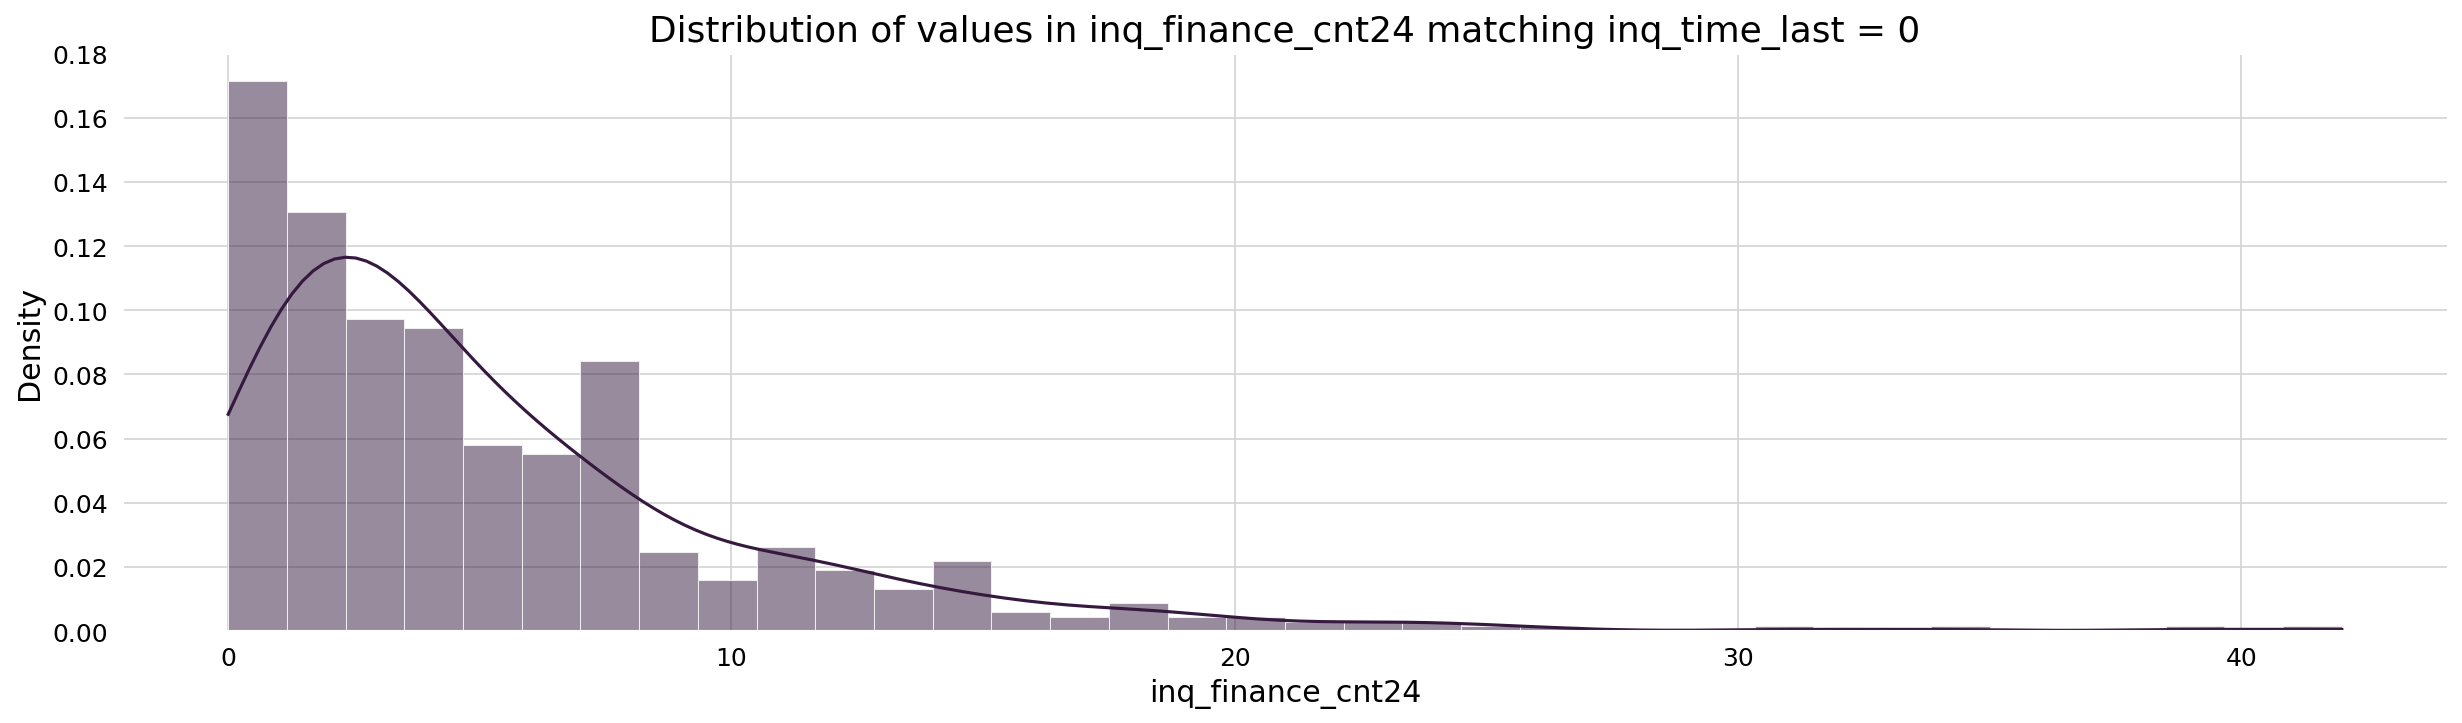

In [20]:
# New Dataframe
aux = df.loc[df['inq_time_last'] == 0]

# Plot
sns.histplot(aux['inq_finance_cnt24'], kde=True, stat='density')

# Setting image
set_image('Distribution of values in inq_finance_cnt24 matching inq_time_last = 0', 'inq_finance_cnt24', 'Density')

In [21]:
# Filling missing values in 'inq_time_last' as zeros
df['inq_time_last'].fillna(0, inplace=True)

#### 2.4.2. Other missing values

In [22]:
df.loc[df['tl75_util_cnt'].isna()]

,target,derog_cnt,collect_cnt,banruptcy_ind,inq_cnt06,inq_time_last,inq_finance_cnt24,tl_time_first,tl_time_last,tl_cnt03,tl_cnt12,tl_cnt24,tl_cnt,tl_sum,tl_max_sum,tl_sat_cnt,tl_del60_cnt,tl_bad_cnt24,tl75_util_cnt,tl50_util_cnt,tl_bal_hc_pct,tl_sat_pct,tl_del3060_cnt24,tl_del90_cnt24,tl_del60_cnt_all,tl_open_pct,tl_bad_derog_cnt,tl_del60_cnt24,tl_open24_pct
32,1,1,1,0,2,1.000,4,206,21,0,0,1,1.000,0.000,0.000,7.000,1,0,NaN,NaN,0.000,0.250,0,0,3,0.130,1,0,1.000
56,1,0,0,0,0,0.000,0,7,7,0,1,1,1.000,NaN,NaN,0.000,1,0,NaN,NaN,NaN,0.000,2,0,1,1.000,0,1,1.000
171,1,5,5,0,0,12.000,3,11,11,0,1,1,1.000,NaN,NaN,1.000,0,0,NaN,NaN,NaN,1.000,0,0,0,1.000,1,0,1.000
215,1,1,0,0,9,4.000,4,18,12,0,1,2,0.000,0.000,0.000,2.000,0,0,NaN,NaN,0.000,0.500,2,0,1,0.000,0,1,0.000
233,1,11,11,0,2,0.000,4,40,40,0,0,0,NaN,NaN,NaN,0.000,1,0,NaN,NaN,NaN,0.000,0,1,1,NaN,7,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0,0,0,0,1,5.000,1,116,4,0,1,1,1.000,NaN,NaN,4.000,0,0,NaN,NaN,NaN,0.250,0,1,1,0.250,1,1,1.000
2877,0,3,0,0,2,1.000,3,146,63,0,0,0,1.000,NaN,NaN,3.000,0,0,NaN,NaN,NaN,0.330,0,0,1,0.330,1,0,0.000
2908,0,0,0,0,0,0.000,0,313,185,0,0,0,2.000,NaN,NaN,2.000,0,0,NaN,NaN,NaN,1.000,0,0,0,1.000,0,0,0.000
2945,0,2,1,1,0,13.000,1,207,40,0,0,0,4.000,0.000,7443.000,11.000,5,0,NaN,NaN,0.000,0.440,0,0,7,0.250,0,0,0.000


In [25]:
# df.loc[df['tl_sum'].isna()]

In [24]:
# df.loc[df['tl_bal_hc_pct'].isna()]

In [27]:
# Considering there is a lack of information about the dataset, columns meaning and their relationships, the NaNs will be filled with the mean of each column
# Other possible method is to fill with zeros, which we can put into practice if the results are not satisfactory

# Filling missing values with their respective mean
df.fillna(df.mean(), inplace=True)

# Checking missing values
df.isna().sum()

target               0
derog_cnt            0
collect_cnt          0
banruptcy_ind        0
inq_cnt06            0
inq_time_last        0
inq_finance_cnt24    0
tl_time_first        0
tl_time_last         0
tl_cnt03             0
tl_cnt12             0
tl_cnt24             0
tl_cnt               0
tl_sum               0
tl_max_sum           0
tl_sat_cnt           0
tl_del60_cnt         0
tl_bad_cnt24         0
tl75_util_cnt        0
tl50_util_cnt        0
tl_bal_hc_pct        0
tl_sat_pct           0
tl_del3060_cnt24     0
tl_del90_cnt24       0
tl_del60_cnt_all     0
tl_open_pct          0
tl_bad_derog_cnt     0
tl_del60_cnt24       0
tl_open24_pct        0
dtype: int64

## 3. EDA

### 3.1. Target Variable

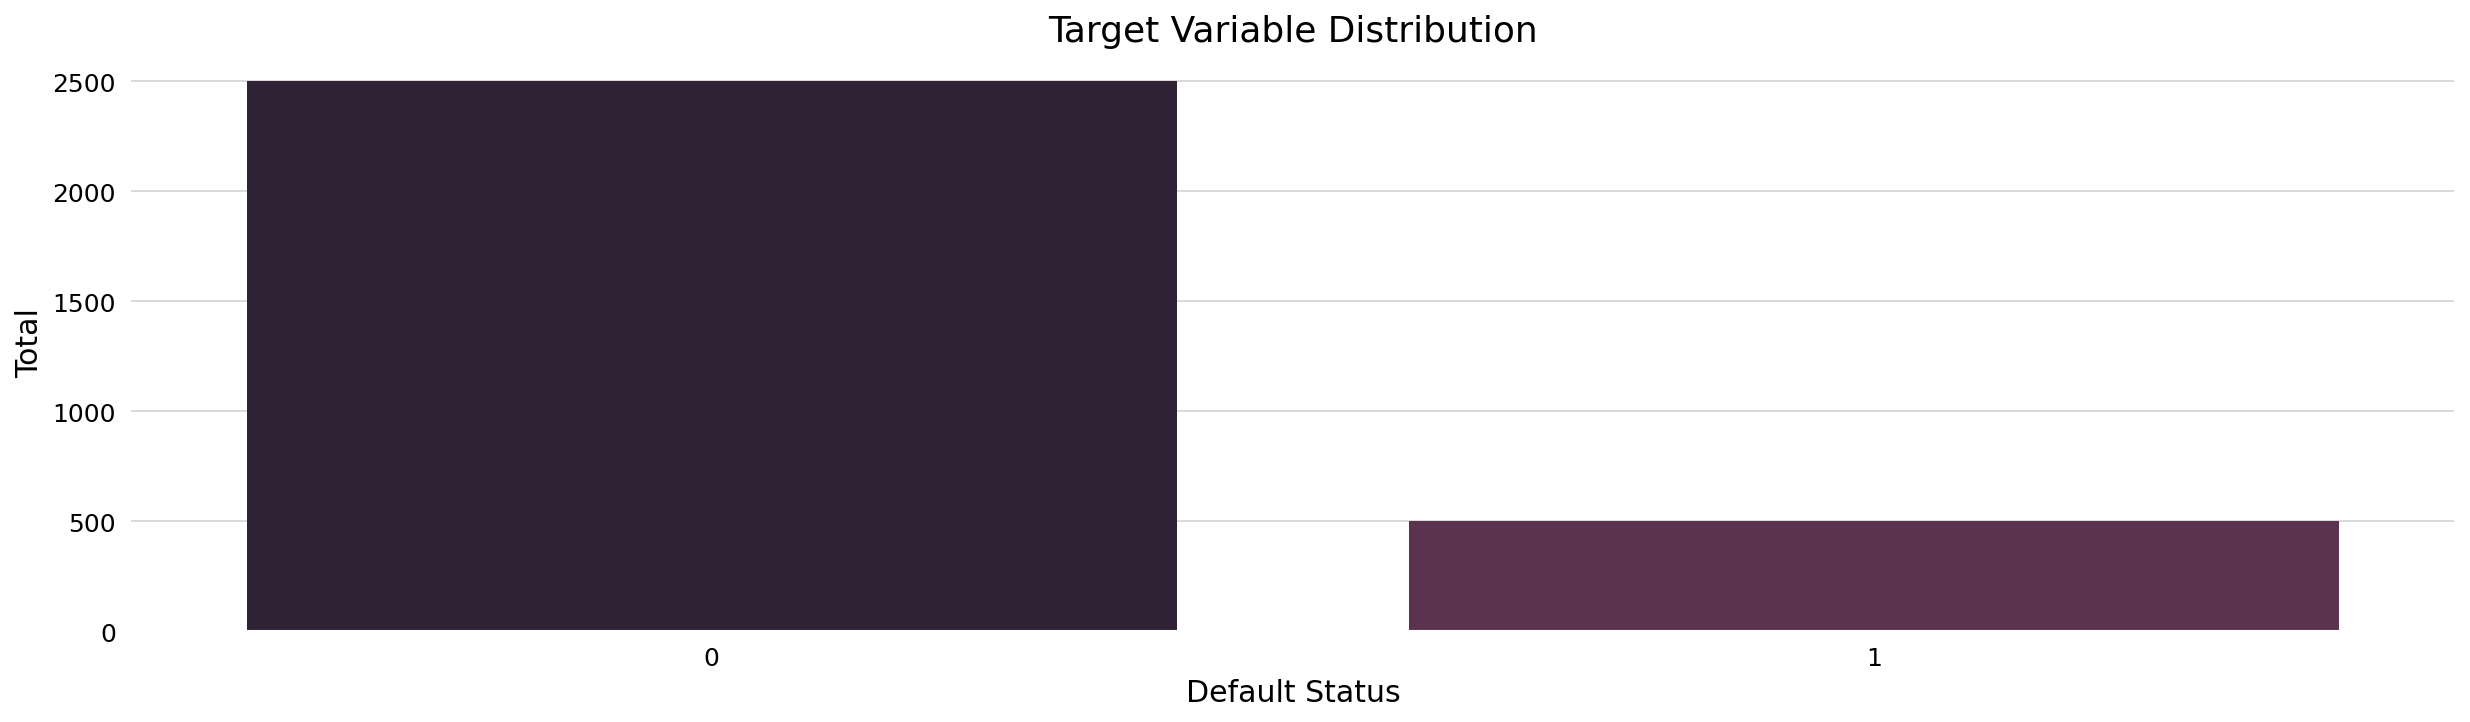

In [38]:
sns.countplot(df, x='target', saturation=0.5)

set_image('Target Variable Distribution', 'Default Status', 'Total')

In [30]:
print('Good Loans in dataset: {}%'.format(np.round(df['target'].value_counts(normalize=True)[0]*100, 2)))
print('Bad Loans in dataset: {}%'.format(np.round(df['target'].value_counts(normalize=True)[1]*100, 2)))

Good Loans in dataset: 83.33%
Bad Loans in dataset: 16.67%


### 3.2. Correlation 

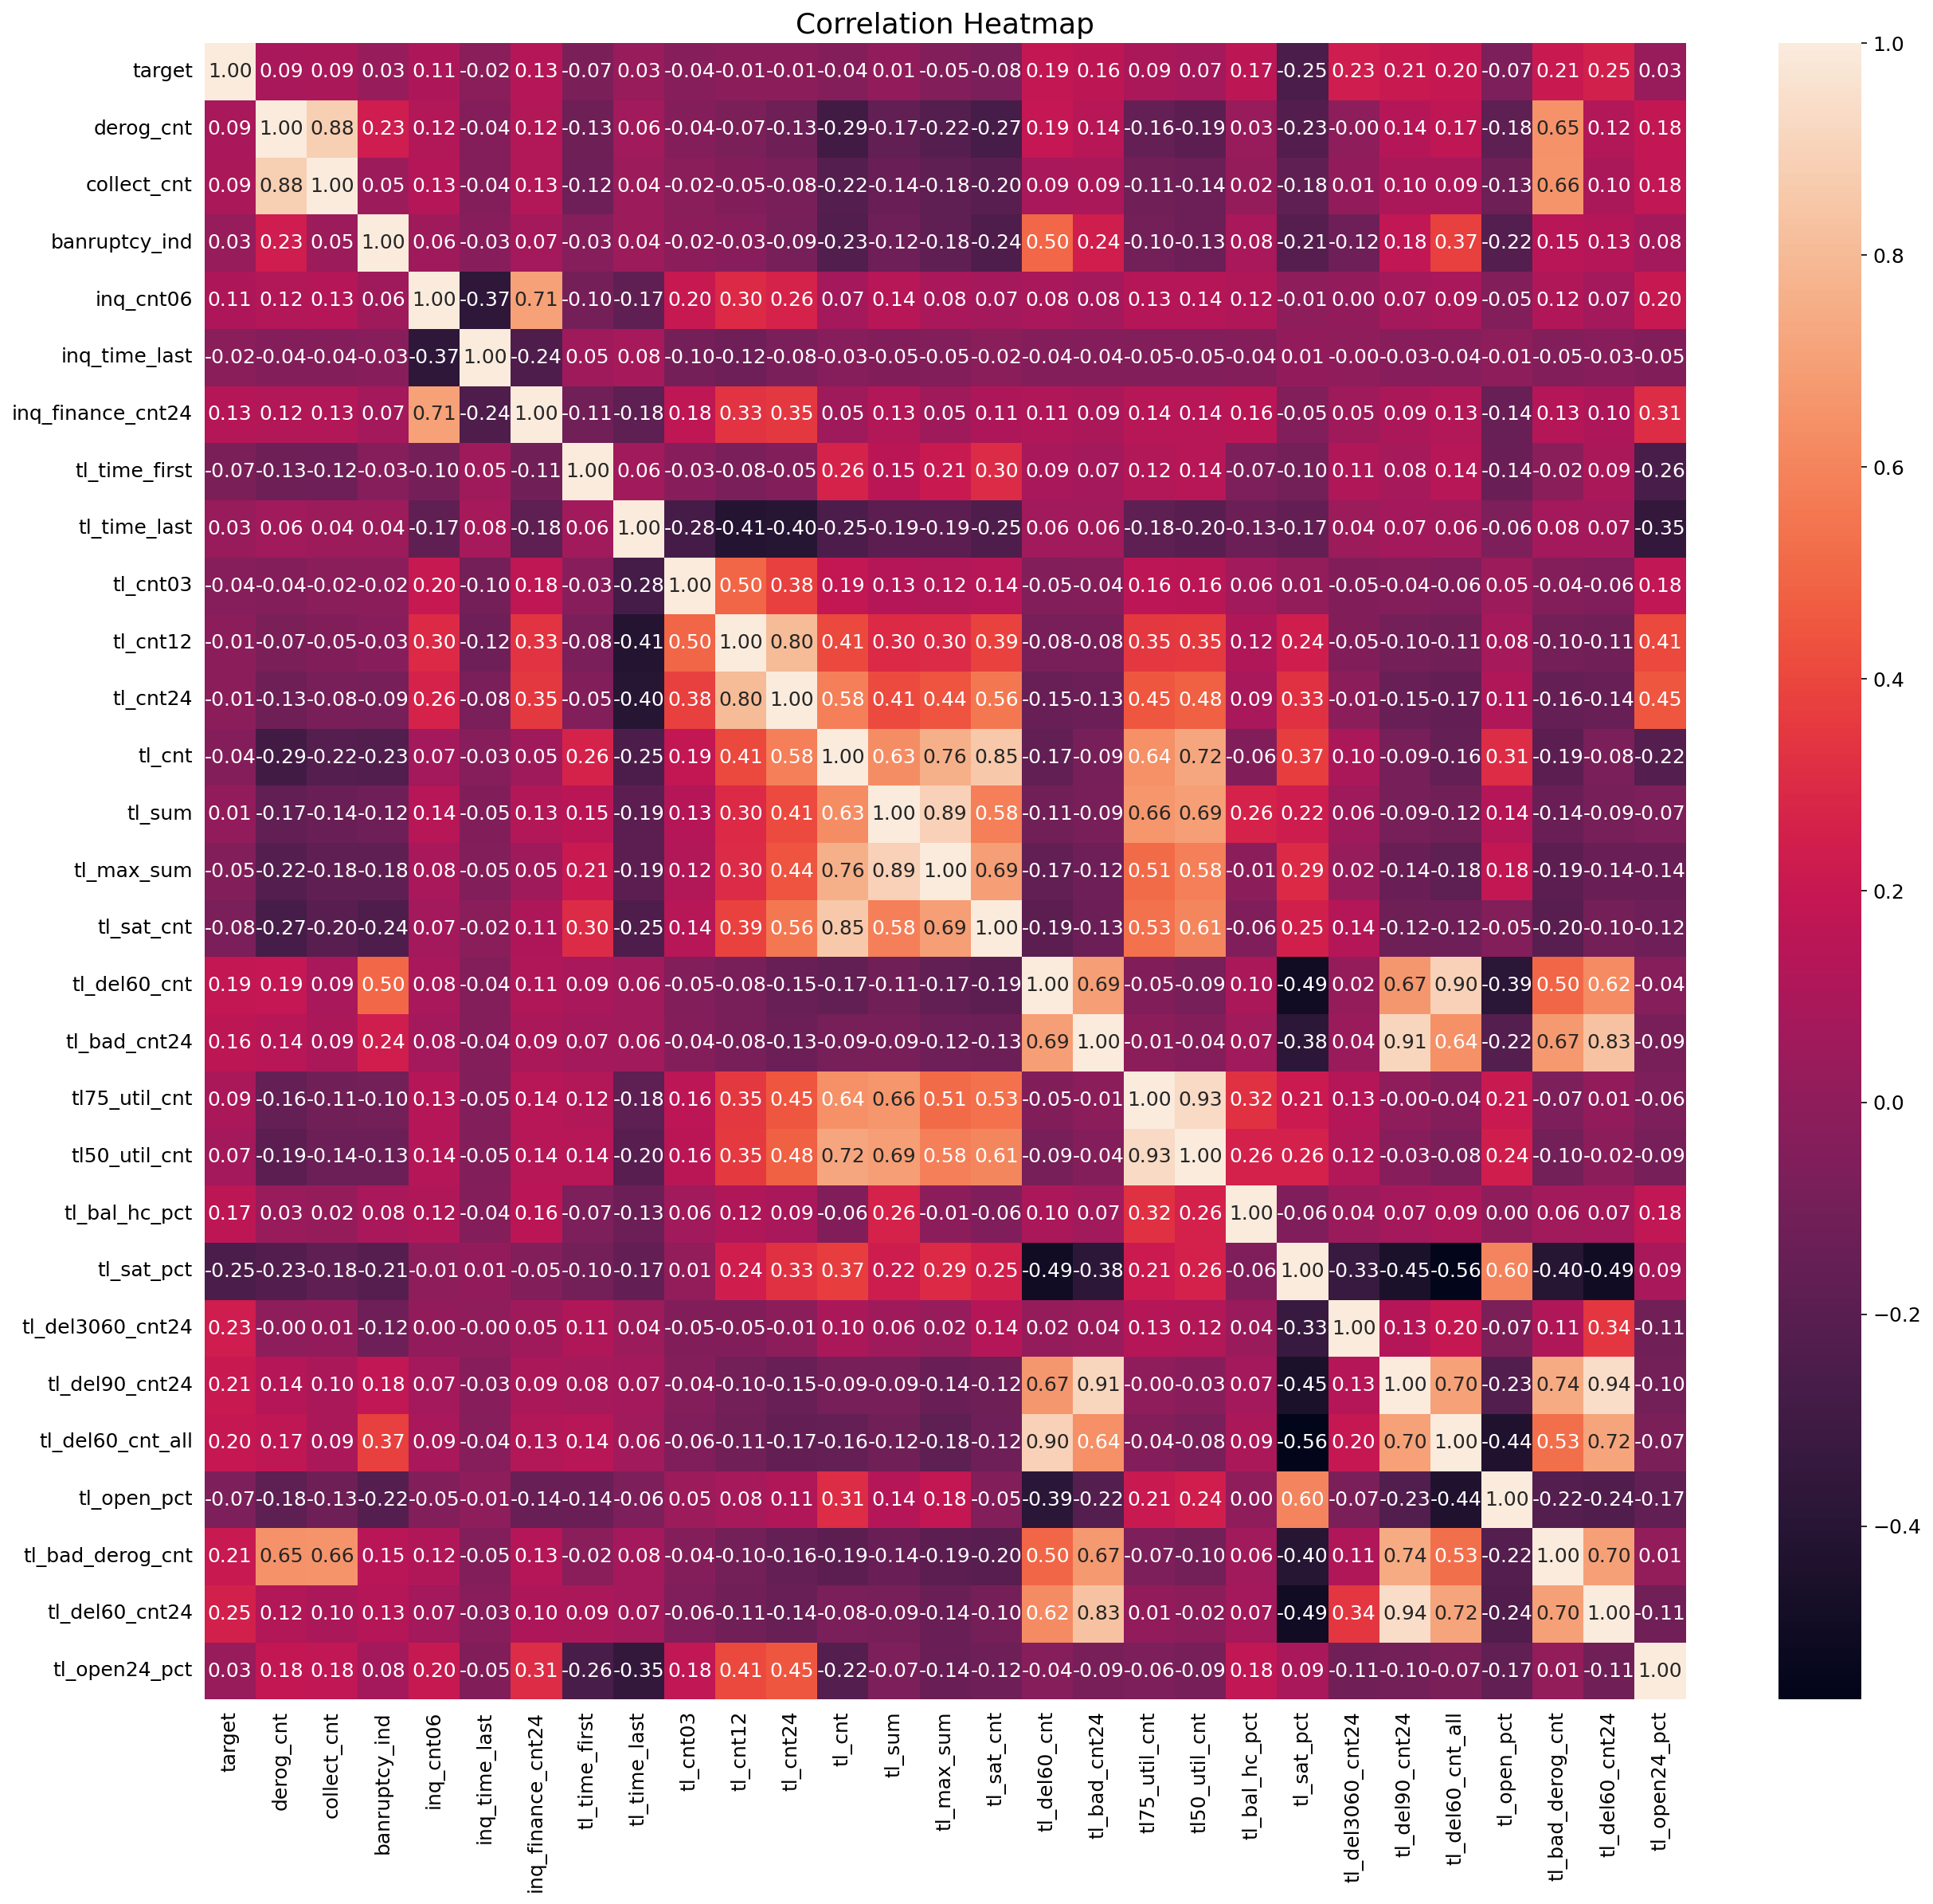

In [37]:
# Increase the size of the plot
plt.figure(figsize=(20, 18))

# Correlation
sns.heatmap(df.corr(), annot=True, fmt='.2f')

# Settings
set_image('Correlation Heatmap', None, None, 90)

### 3.3. Distributions

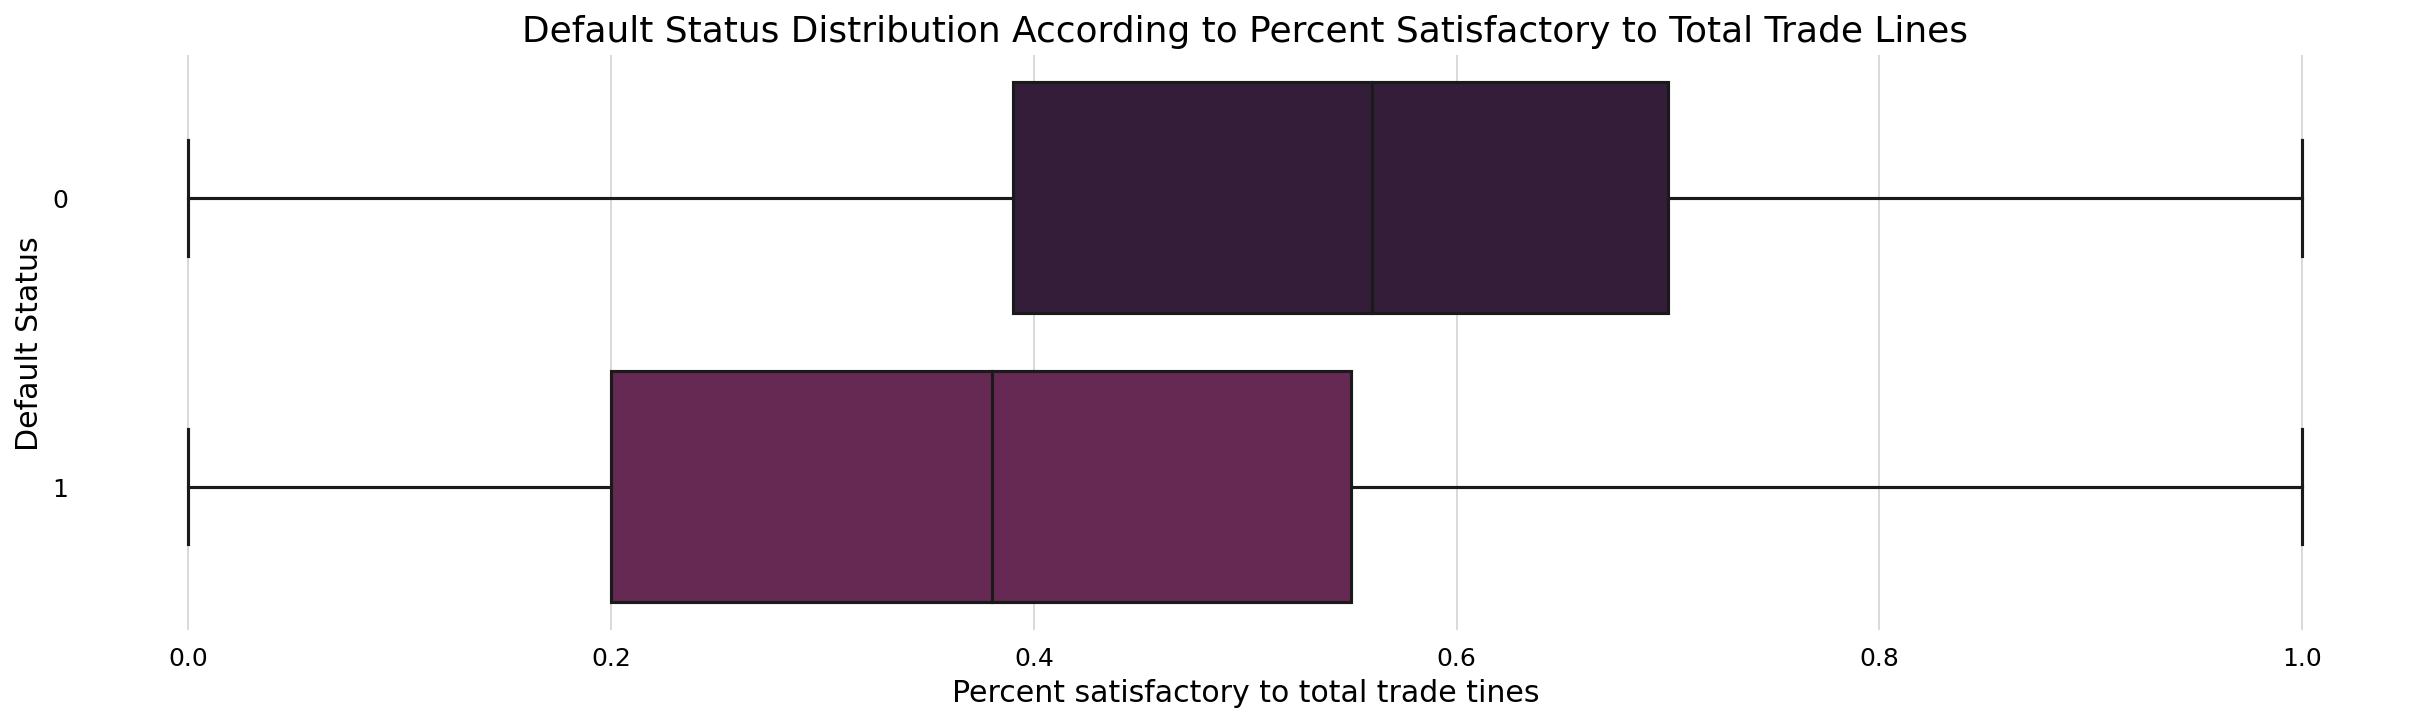

In [53]:
# The column 'tl_sat_pct' has shown a strong negative correlation with the target variable
# Distribution plot
sns.boxplot(data=df, x = "tl_sat_pct", y = "target", orient='h')

# Settings
set_image('Default Status Distribution According to Percent Satisfactory to Total Trade Lines', 'Percent satisfactory to total trade tines', 'Default Status')

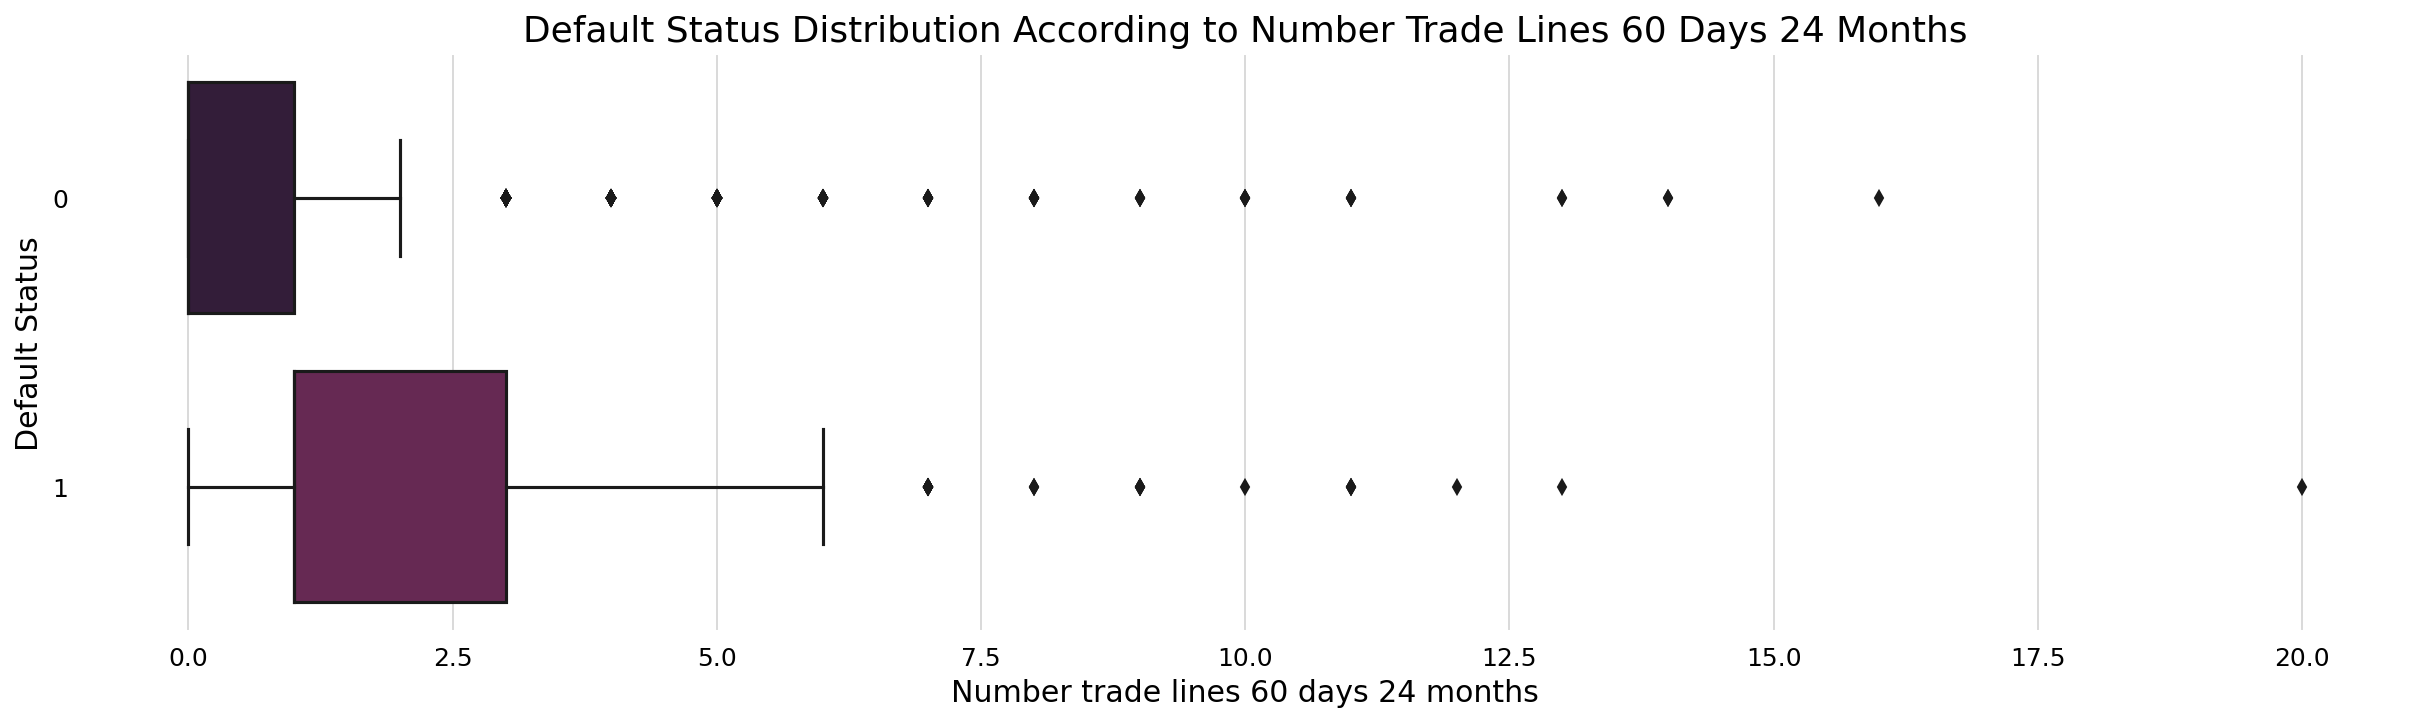

In [52]:
# The column 'tl_del60_cnt24' has shown a strong positive correlation with the target variable
# Distribution plot
sns.boxplot(data=df, x = "tl_del60_cnt24", y = "target", orient='h')

# Settings 
set_image('Default Status Distribution According to Number Trade Lines 60 Days 24 Months', 'Number trade lines 60 days 24 months', 'Default Status')

## 4. Machine Learning

In [56]:
df_shape(df)

Number of rows: 3,000
Number of columns: 29


### 4.1. Train Test Split

In [57]:
# Separating features and target
X = df.iloc[:, 1:28].values
y = df.iloc[:, 0].values

In [58]:
# Training and testing at 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4.2. Scaling

In order to avoid data leakage, the scaling is applied after the train test split.

Furthermore, since some columns in the dataset have outliers, the Robust Scaler will be used.

In [60]:
# Scaling model
scaler      = RobustScaler()

# Fit the scaler to data
scaler.fit(X_train)

# Transform both the training and test data using the same scaler
X_train     = scaler.transform(X_train)
X_test      = scaler.transform(X_test)

### 4.3. Random Forest

In [71]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf_classifier.fit(X_train, y_train)

# Predicting
y_pred = rf_classifier.predict(X_test)

#### 4.3.1. Model Performance

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       482
           1       0.64      0.12      0.20       118

    accuracy                           0.81       600
   macro avg       0.73      0.55      0.55       600
weighted avg       0.78      0.81      0.76       600



In [73]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[474   8]
 [104  14]]


In [75]:
print("Accuracy:", np.round(accuracy_score(y_test, y_pred), 4)*100)

Accuracy: 81.33


### 4.4. Logistic Regression

In [76]:
# Logistic Regression
classifier = LogisticRegression()

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting
y_pred = classifier.predict(X_test)

#### 4.4.1. Model Performance

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       482
           1       0.57      0.18      0.27       118

    accuracy                           0.81       600
   macro avg       0.70      0.57      0.58       600
weighted avg       0.78      0.81      0.77       600



In [78]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[466  16]
 [ 97  21]]


In [79]:
print("Accuracy:", np.round(accuracy_score(y_test, y_pred), 4)*100)

Accuracy: 81.17


## 4.5. Output 

Given that the difference between the two models was only 1 error in 600 observations, because the accuracy of Logistic Regression was 81.17 and Random Forest was 81.33, we can conclude that they are pretty similar to each other in this scenario.

In this case, the Logistic Regression model will be chosen in order to its more balanced Confusion Matrix than the Random Forest model.

In [80]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.79079464, 0.20920536],
       [0.92767539, 0.07232461],
       [0.81007985, 0.18992015],
       ...,
       [0.52059039, 0.47940961],
       [0.97458319, 0.02541681],
       [0.98702339, 0.01297661]])

In [81]:
# Creating a dataframe with probabilities
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])

# Adding the predicted target
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['pred_target'])

# Adding the actual outcome
df_test_dataset = pd.DataFrame(y_test, columns = ['actual_outcome'])

# Concatenating
output = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis = 1)

# Display
output

,actual_outcome,prob_0,prob_1,pred_target
0,0,0.791,0.209,0
1,0,0.928,0.072,0
2,0,0.810,0.190,0
3,1,0.734,0.266,0
4,0,0.904,0.096,0
...,...,...,...,...
595,1,0.521,0.479,0
596,0,0.768,0.232,0
597,0,0.521,0.479,0
598,0,0.975,0.025,0


In [82]:
# Sorting by probability of non-default
output.sort_values(by='prob_0', ascending = False, inplace = True)

# Crating deciles
output['decile'] = pd.qcut(output['prob_0'], q=10, labels=False)

# Deciles in inversed order
output['decile'] = (9 - output['decile']) + 1

# Display 
output

,actual_outcome,prob_0,prob_1,pred_target,decile
483,0,0.991,0.009,0,1
223,0,0.990,0.010,0,1
386,0,0.988,0.012,0,1
325,0,0.988,0.012,0,1
599,0,0.987,0.013,0,1
...,...,...,...,...,...
167,0,0.125,0.875,1,10
427,1,0.118,0.882,1,10
225,1,0.092,0.908,1,10
370,1,0.039,0.961,1,10


## 5. Business Performance

### 5.1. Calculating Performance Metrics

In [83]:
# Empty dictionary
bp = {
    'decile':[],
    'count_of_decile': [],
    'sum_of_actual_outcome': [],
    'min_prob_good': [],
    'good': []
}

# Loop through each decile 
for i in range(1,11):
    aux = output.loc[output['decile'] == i]
    
    count_of_decile = len(aux)
    sum_of_actual_outcome = aux['actual_outcome'].sum()
    min_prob_good = aux['prob_0'].min()
    good = count_of_decile - sum_of_actual_outcome

    bp['decile'].append(i)
    bp['count_of_decile'].append(count_of_decile)
    bp['sum_of_actual_outcome'].append(sum_of_actual_outcome)
    bp['min_prob_good'].append(min_prob_good)
    bp['good'].append(good)

# From dictionary to dataframe
bp = pd.DataFrame.from_dict(bp)

# Adding cumulative values
for row in bp.index:
    bp.loc[row, 'cumm_good'] = bp.head(row+1)['good'].sum()
    bp.loc[row, 'cumm_bad'] = bp.head(row+1)['sum_of_actual_outcome'].sum()

# Adding percentages
bp['cumm_good_perc'] = bp['cumm_good']/bp['good'].sum()
bp['cumm_bad_perc'] = bp['cumm_bad']/bp['sum_of_actual_outcome'].sum()
bp['cumm_bad_avoided_perc'] = 1 - bp['cumm_bad_perc']

# New index
bp.set_index('decile', inplace=True)

# Display
bp


,count_of_decile,sum_of_actual_outcome,min_prob_good,good,cumm_good,cumm_bad,cumm_good_perc,cumm_bad_perc,cumm_bad_avoided_perc
decile,,,,,,,,,
1,60,0,0.975,60,60.000,0.000,0.124,0.000,1.000
2,60,0,0.963,60,120.000,0.000,0.249,0.000,1.000
3,60,4,0.945,56,176.000,4.000,0.365,0.034,0.966
4,60,8,0.928,52,228.000,12.000,0.473,0.102,0.898
5,60,9,0.909,51,279.000,21.000,0.579,0.178,0.822
6,60,7,0.876,53,332.000,28.000,0.689,0.237,0.763
7,60,12,0.824,48,380.000,40.000,0.788,0.339,0.661
8,60,13,0.742,47,427.000,53.000,0.886,0.449,0.551
9,60,34,0.584,26,453.000,87.000,0.940,0.737,0.263


### 5.2. Results Table

In [84]:
# Copy
business_results = bp.copy()

# Changing data types
business_results['cumm_good']               = business_results['cumm_good'].astype(int)
business_results['cumm_bad']                = business_results['cumm_bad'].astype(int)

# Formatting
business_results['min_prob_good']           = (np.round(business_results['min_prob_good'] * 100, 1)).astype(str) + '%'
business_results['cumm_good_perc']          = (np.round(business_results['cumm_good_perc'] * 100, 1)).astype(str) + '%'
business_results['cumm_bad_perc']           = (np.round(business_results['cumm_bad_perc'] * 100, 1)).astype(str) + '%'
business_results['cumm_bad_avoided_perc']   = (np.round(business_results['cumm_bad_avoided_perc'] * 100, 1)).astype(str) + '%'

# Display
business_results


,count_of_decile,sum_of_actual_outcome,min_prob_good,good,cumm_good,cumm_bad,cumm_good_perc,cumm_bad_perc,cumm_bad_avoided_perc
decile,,,,,,,,,
1,60,0,97.5%,60,60,0,12.4%,0.0%,100.0%
2,60,0,96.3%,60,120,0,24.9%,0.0%,100.0%
3,60,4,94.5%,56,176,4,36.5%,3.4%,96.6%
4,60,8,92.8%,52,228,12,47.3%,10.2%,89.8%
5,60,9,90.9%,51,279,21,57.9%,17.8%,82.2%
6,60,7,87.6%,53,332,28,68.9%,23.7%,76.3%
7,60,12,82.4%,48,380,40,78.8%,33.9%,66.1%
8,60,13,74.2%,47,427,53,88.6%,44.9%,55.1%
9,60,34,58.4%,26,453,87,94.0%,73.7%,26.3%


#### 5.2.1. Reading Results Table

In deciles 1, 2, and 3, we find our top-performing customers. For businesses seeking a highly conservative loan approval strategy, these deciles offer an ideal choice. These top deciles exhibit an impressive minimum non-default probability of 94.5%, with only 4 out of 180 borrowers expected to default. By selecting these top 3 deciles, a business can effectively avoid 96.6% of high-risk customers.

However, it's essential for a bank to align its strategy with the business's objectives. In other words, the bank must determine the desired level of exposure to risky customers. As we move down the decile sets, businesses can access a larger pool of good customers, but this expansion comes at the trade-off of increasing exposure to higher-risk borrowers. Therefore, the selection of deciles is a strategic decision that must be finely tuned to strike the right balance between growing the customer base and managing risk effectively.

### 5.3. Profit to Business

Taking the profit assumptions into account, we have that every good customer returns $100 as profit and every bad customer costs $500 to the bank.

In [85]:
# Calculating the profit to business
business_results['profit_to_business'] = business_results['cumm_good'] * 100 - business_results['cumm_bad'] * 500

# Apply locale formatting to the column
business_results['profit_to_business'] = business_results['profit_to_business'].apply(lambda x: locale.format_string("%d", x, grouping=True))

# Formatting the column as currency
business_results['profit_to_business'] = '$' + ((business_results['profit_to_business']).astype(str))

# Display
business_results

,count_of_decile,sum_of_actual_outcome,min_prob_good,good,cumm_good,cumm_bad,cumm_good_perc,cumm_bad_perc,cumm_bad_avoided_perc,profit_to_business
decile,,,,,,,,,,
1,60,0,97.5%,60,60,0,12.4%,0.0%,100.0%,"$6,000"
2,60,0,96.3%,60,120,0,24.9%,0.0%,100.0%,"$12,000"
3,60,4,94.5%,56,176,4,36.5%,3.4%,96.6%,"$15,600"
4,60,8,92.8%,52,228,12,47.3%,10.2%,89.8%,"$16,800"
5,60,9,90.9%,51,279,21,57.9%,17.8%,82.2%,"$17,400"
6,60,7,87.6%,53,332,28,68.9%,23.7%,76.3%,"$19,200"
7,60,12,82.4%,48,380,40,78.8%,33.9%,66.1%,"$18,000"
8,60,13,74.2%,47,427,53,88.6%,44.9%,55.1%,"$16,200"
9,60,34,58.4%,26,453,87,94.0%,73.7%,26.3%,"$1,800"


As evident from the data, the peak of profitability is achieved in the sixth decile, delivering a profit of $19,200. Nevertheless, banks may opt to explore opportunities in the adjacent deciles, even while some potential profits may be sacrificed. Take, for example, the seventh decile, characterized by a cutoff probability of 82.4%. This strategic decision allows banks to not only maximize their market share but also broadens their customer base,  with a consideration of the trade-off in potential profitability.

### 5.4. ROC Curve

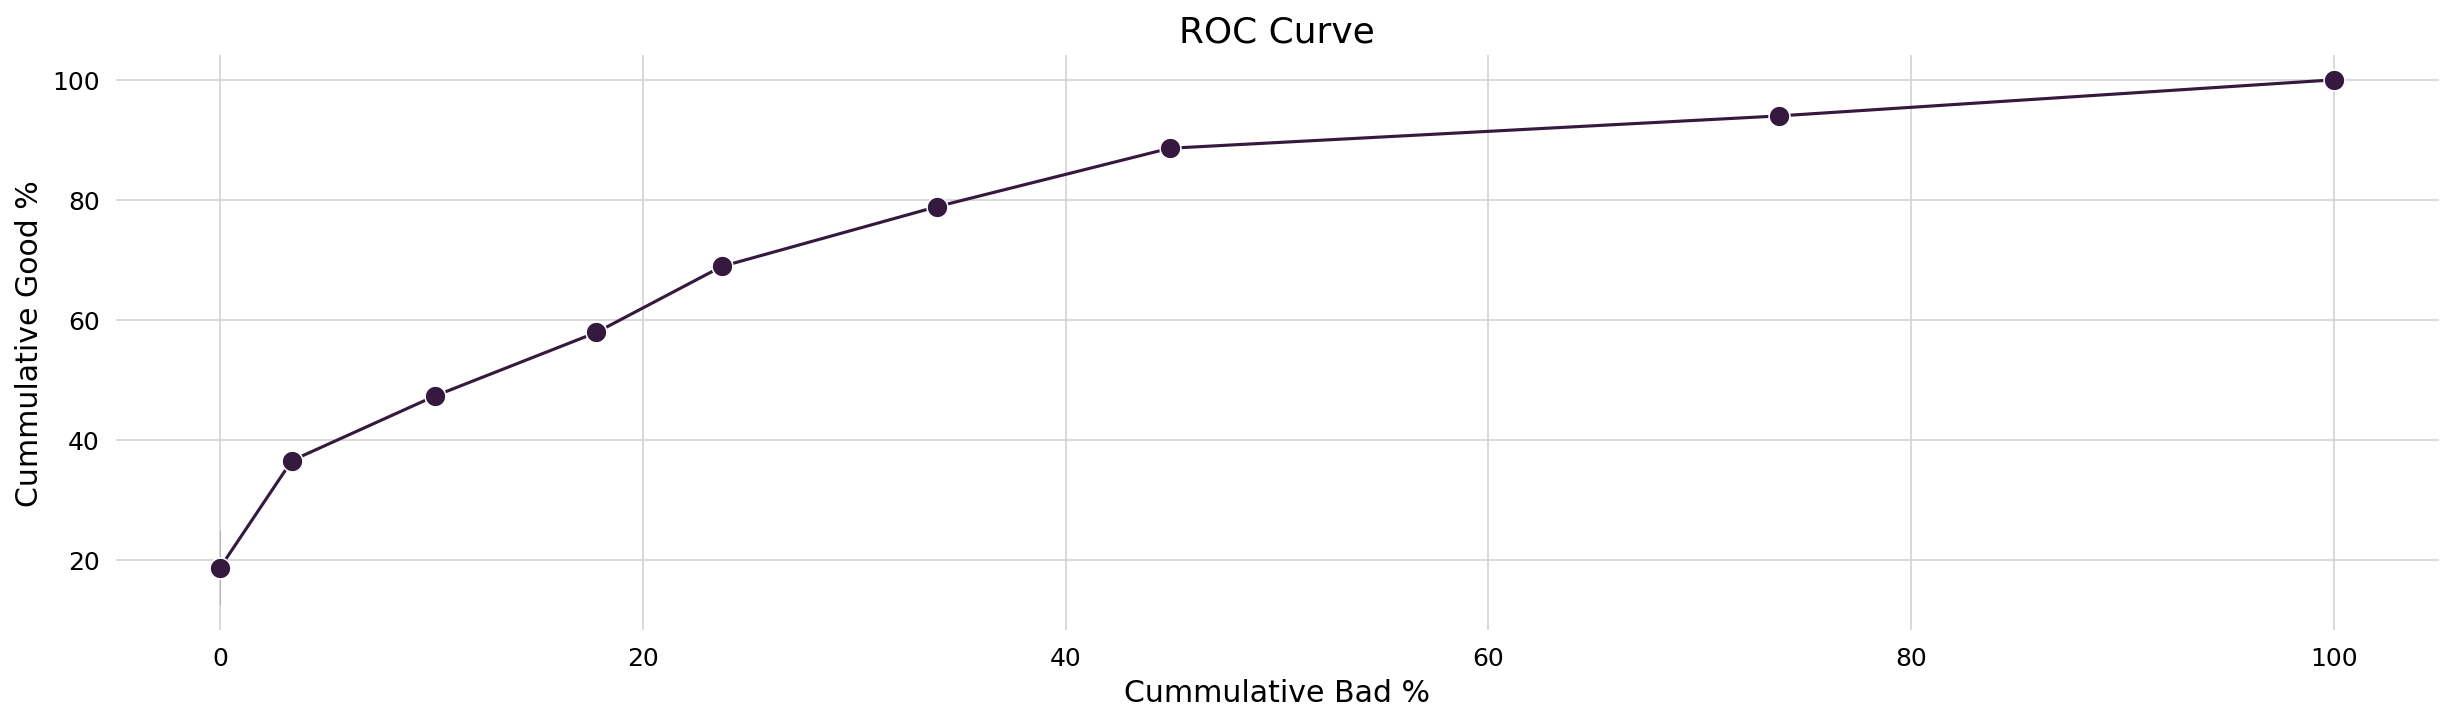

In [87]:
# Creating empty dataframe
aux = pd.DataFrame()

# Formatting columns
aux['cumm_bad_perc']    = np.round(bp['cumm_bad_perc']*100, 2)
aux['cumm_good_perc']   = np.round(bp['cumm_good_perc']*100, 2)

# Creating Plot
sns.lineplot(data=aux, x='cumm_bad_perc', y='cumm_good_perc', marker='o', markersize=10)

# Settings
plt.grid(True)
set_image('ROC Curve', 'Cummulative Bad %', 'Cummulative Good %')

## 6. Conclusion

**Elevating Profitability and Market Presence Through Informed Decision-Making**

This bank's Credit Score Project aimed to build an in-house risk model for subprime mortgages, with profitability as the primary focus. Each good customer is expected to bring in a profit of 100 dollars, while the cost of a bad customer is a significant 500 dollars. However, the bank's strategy extends beyond pure profit maximization, it encompasses a delicate balance between profitability and market expansion to align with the institution's overall business objectives.

The analysis of credit score deciles has illuminated key insights. The top-performing deciles 1, 2, and 3 are the ideal choice for conservative loan approval strategies. Selecting these top deciles enables businesses to avoid 96.6% of risky customers. Yet, the bank's strategic decision-making doesn't end at profitability. It extends to managing the level of exposure to risky customers, making it a calculated trade-off, recognizing that while potential profits may be somewhat sacrificed, market expansion and customer reach are the key to long-term success. The sixth decile emerges as the peak of profitability, but strategic exploration of adjacent deciles provides opportunities to maximize market share and broaden the customer base. 

This Credit Score Project equips the bank with the tools to make informed lending decisions. However, the path forward lies in the hands of the bank itself, trying to balance between maximizing profits and expanding its market presence.
